# COVID-19 Analysis (Quantitative Modelling)
## Author - Rishabh kumar

In [3]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('covid19.csv')

In [3]:
data.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
sort_data = data.groupby('Date', sort = False).sum()

In [5]:
sort_data = sort_data.drop('Sno', axis =1)
sort_data.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [6]:
sort_data['Total_cases'] = sort_data.sum(axis =1).astype('int')
sort_data.head().reset_index()

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

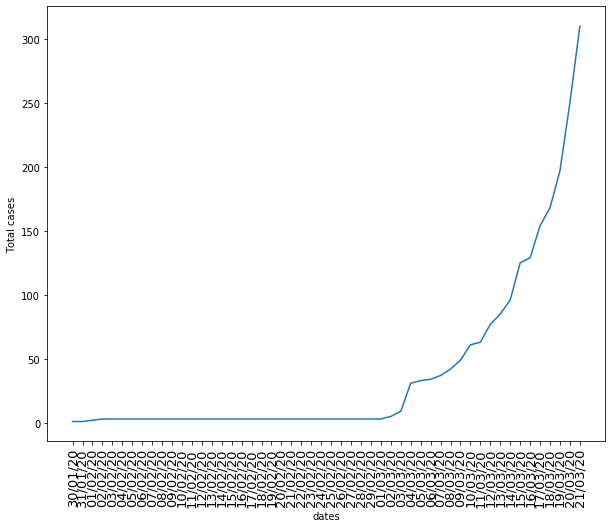

In [21]:
plt.figure(figsize = (10,8))
plt.plot(sort_data['Total_cases'])
plt.xlabel('dates')
plt.ylabel('Total cases')
plt.xticks(rotation = 90, fontsize = 13)
plt.show()

In [24]:
sort_data.tail(20)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
02/03/20,5,0,0,0,5
03/03/20,5,1,3,0,9
04/03/20,12,16,3,0,31
05/03/20,14,16,3,0,33
06/03/20,15,16,3,0,34
07/03/20,18,16,3,0,37
08/03/20,23,16,3,0,42
09/03/20,30,16,3,0,49
10/03/20,42,16,3,0,61


In [28]:
rate_list = []
for i in range(0, sort_data.shape[0]-1):
    
    rate = (sort_data.iloc[i+1]['Total_cases'] - sort_data.iloc[i]['Total_cases'])/sort_data.iloc[i]['Total_cases']
    rate_list.append(rate)
    

In [29]:
avg_rate = np.average(rate_list)
avg_rate

0.15548289717820452

In [30]:
import math

In [32]:
## P_t = p_o*(e^(r*t))
P_o =31
t=26
p_t = round(P_o* (math.exp(avg_rate *t)),2)
p_t

1766.12